<a href="https://colab.research.google.com/github/kbalsamy/da/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [ ]:

!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d austinreese/craigslist-carstrucks-data

 96% 252M/262M [00:01<00:00, 173MB/s]
100% 262M/262M [00:01<00:00, 151MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('craigslist-carstrucks-data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
import os

os.listdir("/content")

['.config', 'vehicles.csv', 'craigslist-carstrucks-data.zip', 'sample_data']

In [11]:
df = pd.read_csv("/content/vehicles.csv")
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [12]:
df.shape

(426880, 26)

In [13]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [14]:
df.nunique(axis=0)

id              426880
url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64

In [ ]:
df.describe().apply(lambda s : s.apply(lambda x : format(x, 'f')))

In [18]:
df.condition.unique()

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [24]:
# reclassify condition column

def clean_condition(row):

  good = ["good", "fair"]

  excellent = ["excellent", "like new"]

  if row.condition in good:
    return 'good'

  if row.condition in excellent:
    return 'excellent'

  return row.condition


def clean_df(playlist):

  df_cleaned = df.copy()

  df_cleaned['condition'] = df_cleaned.apply(lambda row: clean_condition(row), axis = 1)

  return df_cleaned


df_cleaned = clean_df(df)

print(df_cleaned.condition.unique())




[nan 'good' 'excellent' 'new' 'salvage']


In [26]:
# remove redundent variables

df_cleaned = df_cleaned.copy().drop(['url', 'image_url', 'region_url'], axis=1)

df_cleaned

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,drive,size,type,paint_color,description,county,state,lat,long,posting_date
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,...,fwd,NaN,sedan,NaN,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,...,fwd,NaN,sedan,red,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,...,NaN,NaN,hatchback,white,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,...,fwd,NaN,sedan,silver,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [27]:
# remove null values

NA_val = df_cleaned.isna().sum()

print(NA_val)

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


In [29]:
def na_filter(na, threshold = .4):
  col_pass=[]
  for i in na.keys():
    if na[i]/df_cleaned.shape[0] < threshold:
      col_pass.append(i)
  return col_pass

df_cleaned = df_cleaned[na_filter(NA_val)]

df_cleaned.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'fuel',
       'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'type',
       'paint_color', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

<Axes: ylabel='price'>

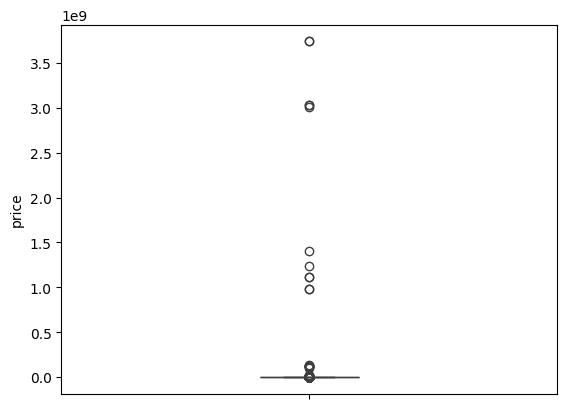

In [34]:
# removing outliers

sns.boxplot(data=df_cleaned["price"], orient='v', width=0.2)

In [33]:
df_cleaned.price.describe()

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

In [35]:
df_cleaned = df_cleaned[df_cleaned['price'].between(999.999, 99999.00)]
df_cleaned.price.describe()

count    379868.000000
mean      19357.851725
std       14334.883486
min        1000.000000
25%        7988.000000
50%       15990.000000
75%       27990.000000
max       99999.000000
Name: price, dtype: float64

In [36]:
df_cleaned = df_cleaned[df_cleaned['year'] > 1990]

df_cleaned = df_cleaned[df_cleaned['odometer'] < 899999.00]

df_cleaned.describe().apply(lambda s : s.apply(lambda x: format(x, 'f')))


,id,price,year,odometer,lat,long
count,364076.000000,364076.000000,364076.000000,364076.000000,360715.000000,360715.000000
mean,7311452510.716609,19435.218990,2012.309262,94376.099759,38.516665,-94.138671
std,4391458.441977,14248.973882,5.747604,66759.644660,5.849388,18.048492
min,7301583321.000000,1000.000000,1991.000000,0.000000,-84.122245,-159.719900
25%,7308050685.750000,7995.000000,2009.000000,39082.000000,34.724400,-110.170000
50%,7312519079.500000,15995.000000,2013.000000,88942.000000,39.254962,-87.871739
75%,7315227796.500000,27991.000000,2017.000000,137000.000000,42.356988,-80.759936
max,7317101084.000000,99999.000000,2022.000000,898163.000000,82.252826,167.629911


In [37]:
# removing rows with null values

df_cleaned = df_cleaned.dropna(axis=0)

df_cleaned.shape

(120453, 19)

Analyzing relationships

<ipython-input-39-a31fe0f04c74>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_cleaned.corr()


<Axes: >

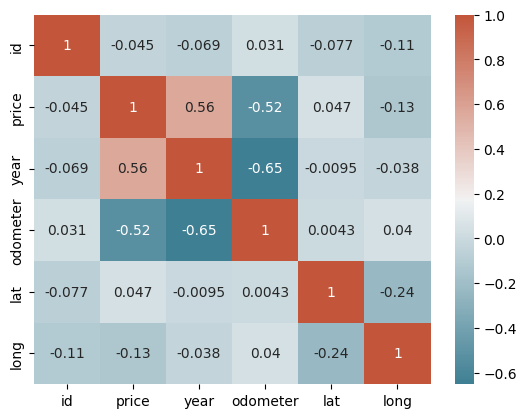

In [39]:
# calculate correlation matrix

corr = df_cleaned.corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap = sns.diverging_palette(220,20,as_cmap=True))

<Axes: xlabel='odometer', ylabel='price'>

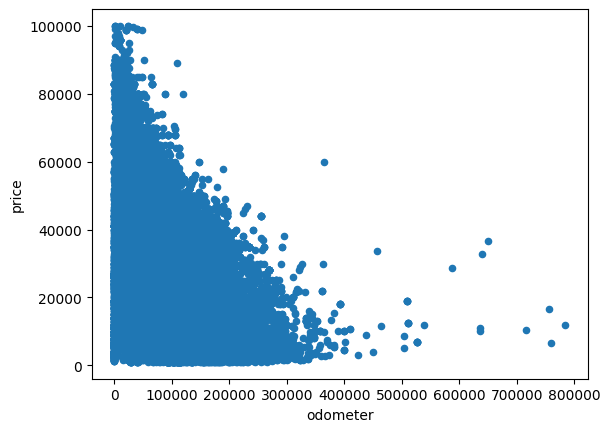

In [40]:
df_cleaned.plot(kind="scatter", x="odometer", y="price")

<Axes: xlabel='year', ylabel='price'>

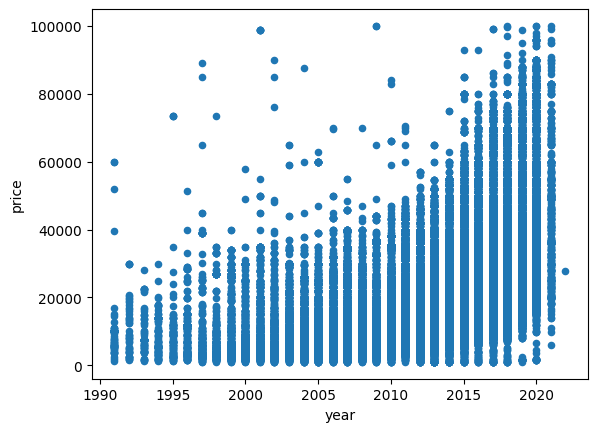

In [42]:
df_cleaned.plot(kind="scatter", x='year', y="price")

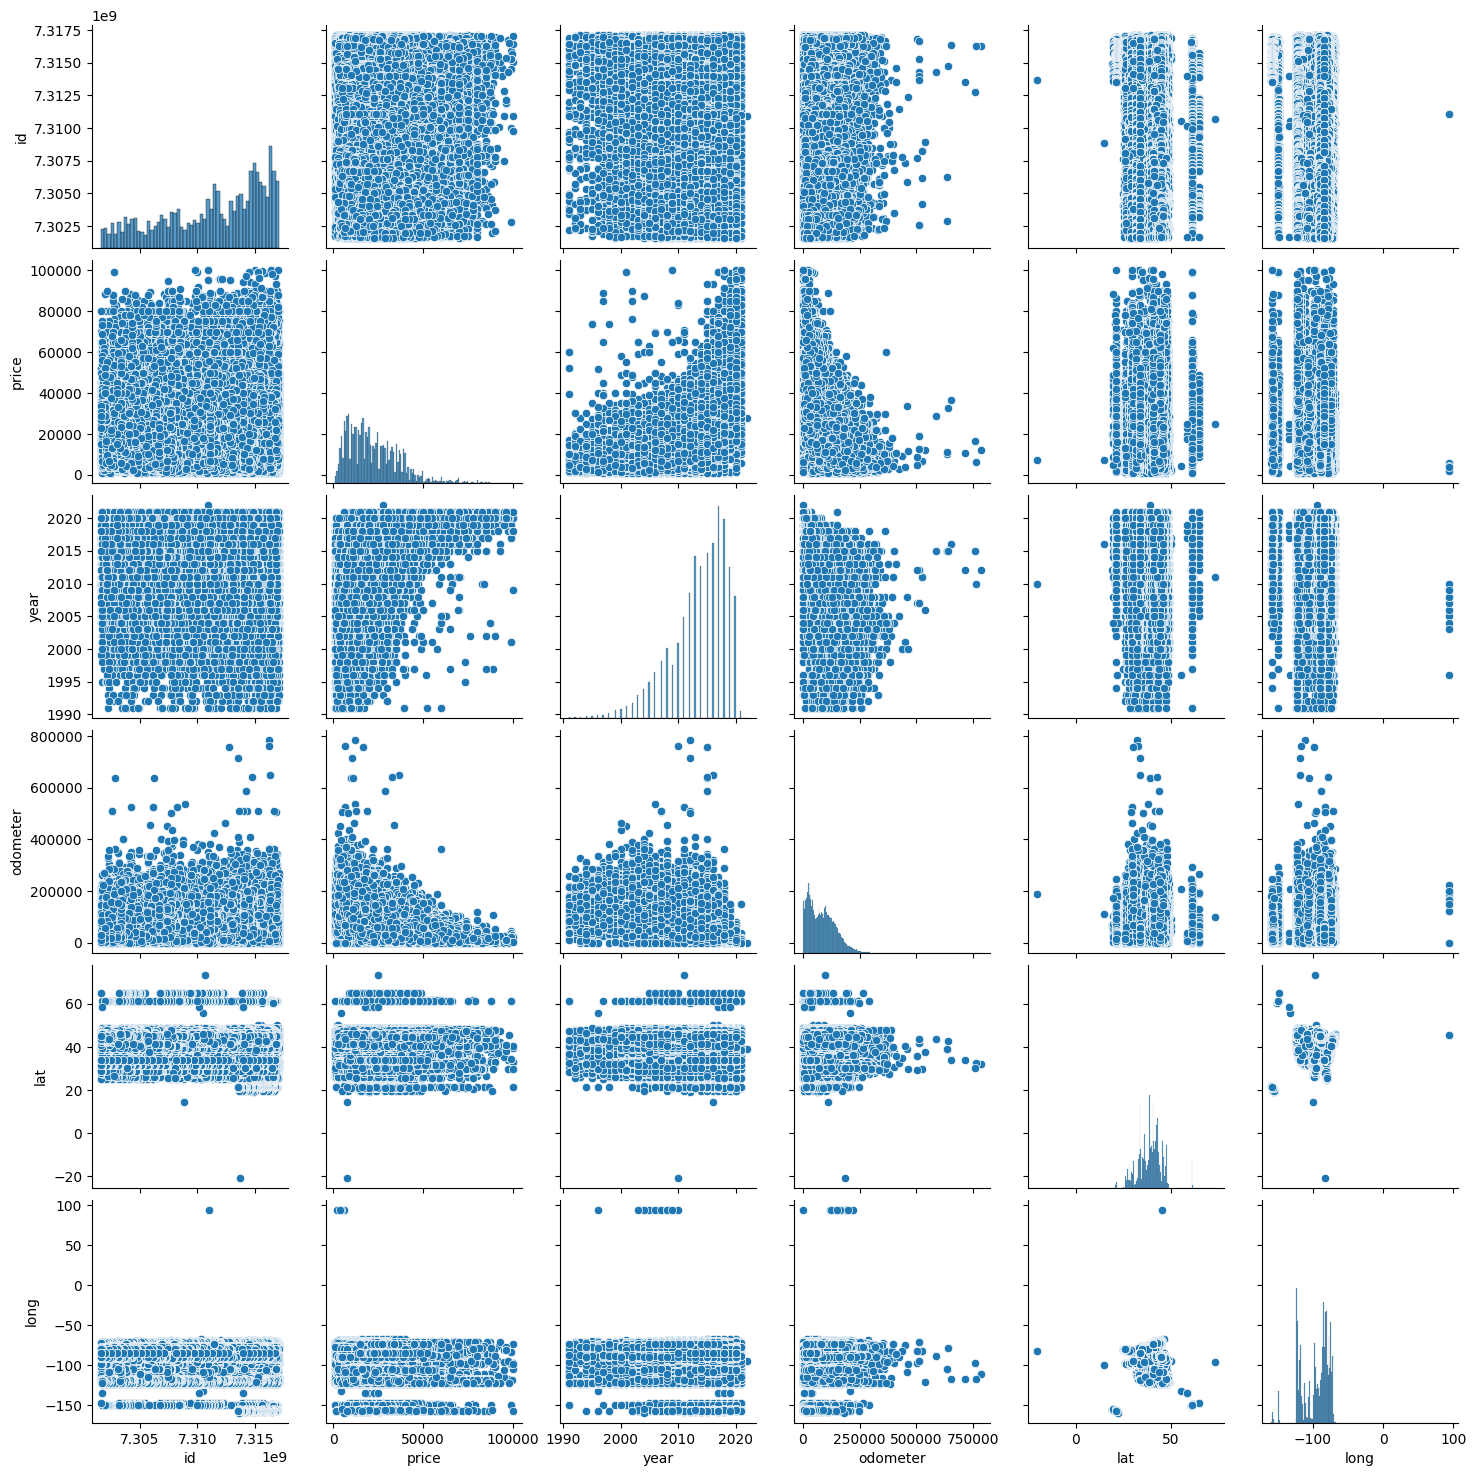

In [43]:
sns.pairplot(df_cleaned)

<Axes: ylabel='Frequency'>

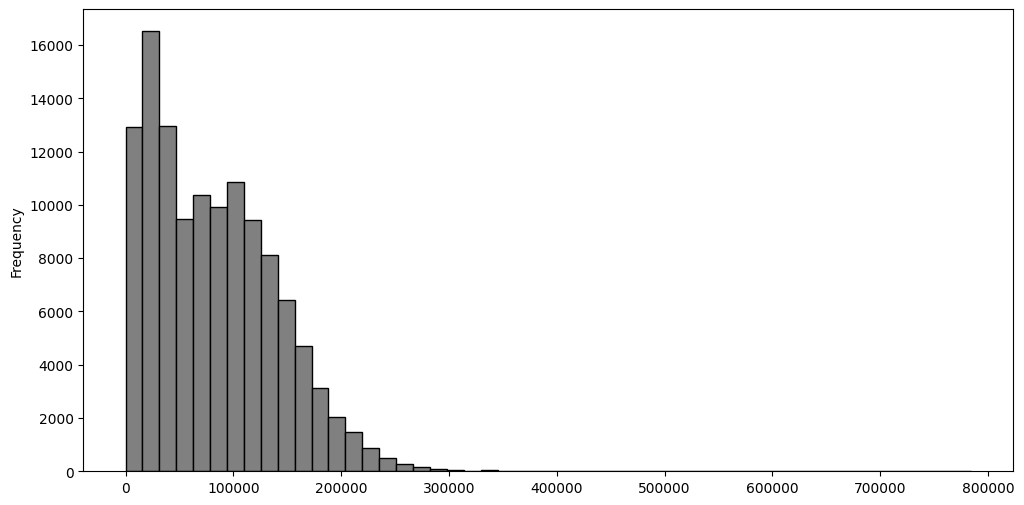

In [44]:
df_cleaned["odometer"].plot(kind="hist", bins=50, figsize=(12,6), facecolor='grey', edgecolor="black")

<Axes: ylabel='Frequency'>

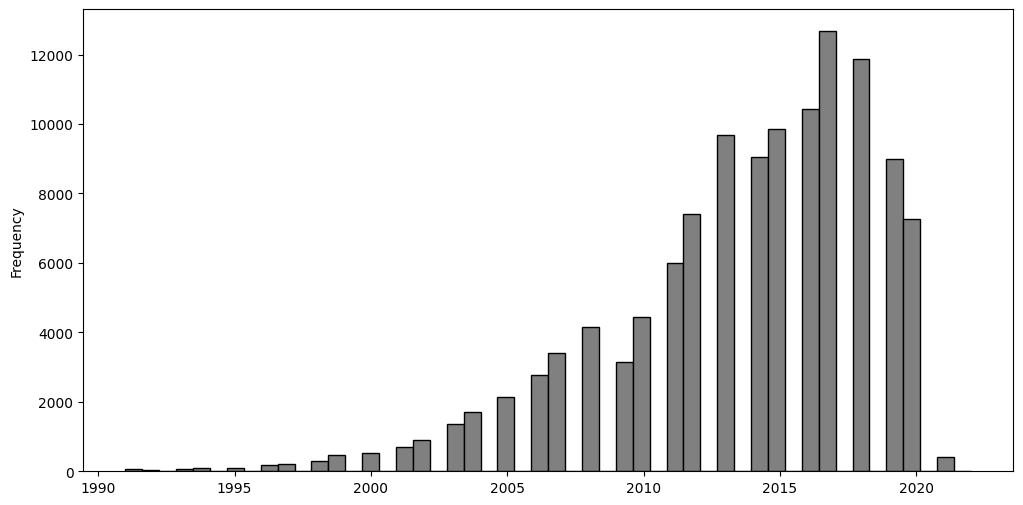

In [45]:
df_cleaned["year"].plot(kind="hist", bins=50, figsize=(12,6), facecolor='grey', edgecolor="black")

<Axes: >

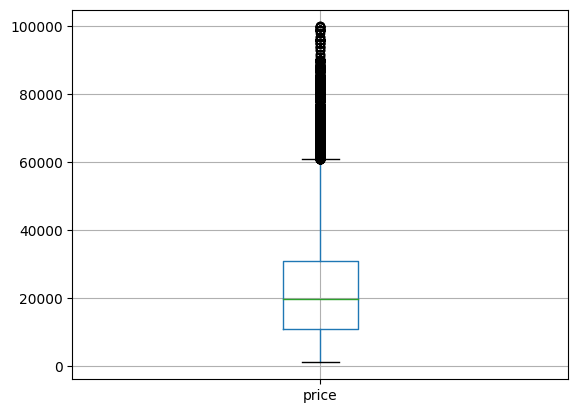

In [46]:
df_cleaned.boxplot("price")